In [1]:
# Get the data for expeirment
import sklearn
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams.update({'font.size': 20})

In [ ]:
# Given the 15min interval measurement of the weather data
# predict the 15min interval power generation

In [2]:
# Weather data is collected at the plant level.
df_x = pd.read_csv('Data/FES/Raw/Plant_1_Weather_Sensor_Data.csv')

# Generation data is collected at the inverter level.
df_y = pd.read_csv('Data/FES/Raw/Plant_1_Generation_Data.csv')

In [3]:
# The weather sensor data should be the input data
df_x

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [4]:
# Not all inventer are working at all times
df_y

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [5]:
# Group the data by date and sum the daily yield
df_grouped = df_y.groupby(pd.to_datetime(df_y['DATE_TIME']))['DAILY_YIELD'].sum()

# Compute the difference of the daily yield between intervals
df_grouped_diff = df_grouped.diff()
df_grouped = pd.concat([df_grouped, df_grouped_diff], axis=1)
df_grouped.columns = ['DAILY_YIELD', 'DAILY_YIELD_DIFF']
df_grouped.reset_index(inplace=True)

print(df_grouped.isnull().sum())
# Print the grouped data and the difference
print(df_grouped)

df_grouped.fillna(0, inplace=True)

DATE_TIME           0
DAILY_YIELD         0
DAILY_YIELD_DIFF    1
dtype: int64
               DATE_TIME    DAILY_YIELD  DAILY_YIELD_DIFF
0    2020-05-15 00:00:00       0.000000               NaN
1    2020-05-15 00:15:00       0.000000          0.000000
2    2020-05-15 00:30:00       0.000000          0.000000
3    2020-05-15 00:45:00       0.000000          0.000000
4    2020-05-15 01:00:00       0.000000          0.000000
...                  ...            ...               ...
3153 2020-06-17 22:45:00  129571.000000          0.000000
3154 2020-06-17 23:00:00  129571.000000          0.000000
3155 2020-06-17 23:15:00  129571.000000          0.000000
3156 2020-06-17 23:30:00  129571.000000          0.000000
3157 2020-06-17 23:45:00  127962.767857      -1608.232143

[3158 rows x 3 columns]


C:\Users\PPL\AppData\Local\Temp\ipykernel_17980\3893788859.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_grouped = df_y.groupby(pd.to_datetime(df_y['DATE_TIME']))['DAILY_YIELD'].sum()


In [6]:
df_grouped

,DATE_TIME,DAILY_YIELD,DAILY_YIELD_DIFF
0,2020-05-15 00:00:00,0.000000,0.000000
1,2020-05-15 00:15:00,0.000000,0.000000
2,2020-05-15 00:30:00,0.000000,0.000000
3,2020-05-15 00:45:00,0.000000,0.000000
4,2020-05-15 01:00:00,0.000000,0.000000
...,...,...,...
3153,2020-06-17 22:45:00,129571.000000,0.000000
3154,2020-06-17 23:00:00,129571.000000,0.000000
3155,2020-06-17 23:15:00,129571.000000,0.000000
3156,2020-06-17 23:30:00,129571.000000,0.000000


In [7]:
# Daily yield difference can not be negative
df_negative = df_grouped.loc[(df_grouped['DAILY_YIELD_DIFF'] < 0)]

df_grouped.loc[df_grouped['DAILY_YIELD_DIFF'] < 0, 'DAILY_YIELD_DIFF'] = 0

In [8]:
# There are some intervals that are not in the generation data, filter out those dates
# do it twice to make sure the data is clean
x_dates_in_grouped = df_x[pd.to_datetime(df_x['DATE_TIME']).isin(pd.to_datetime(df_grouped['DATE_TIME']))]
df_grouped = df_grouped[pd.to_datetime(df_grouped['DATE_TIME']).isin(pd.to_datetime(x_dates_in_grouped['DATE_TIME']))]

In [9]:
x_dates_in_grouped['DATE_TIME'] = pd.to_datetime(x_dates_in_grouped['DATE_TIME'])

C:\Users\PPL\AppData\Local\Temp\ipykernel_17980\1278549241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dates_in_grouped['DATE_TIME'] = pd.to_datetime(x_dates_in_grouped['DATE_TIME'])


In [10]:
new_df = pd.merge(x_dates_in_grouped, df_grouped, on='DATE_TIME')

In [11]:
new_df = new_df.drop(columns=['PLANT_ID', 'SOURCE_KEY', 'DAILY_YIELD'])

In [12]:
new_df['HOUR'] = new_df['DATE_TIME'].dt.hour
new_df['MINUTE'] = new_df['DATE_TIME'].dt.minute

In [13]:
new_df = new_df.drop(columns=['DATE_TIME'])

In [31]:
new_df.loc[new_df['DAILY_YIELD_DIFF'] > 6000]

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAILY_YIELD_DIFF,HOUR,MINUTE
226,31.531130,60.208570,0.997904,6497.339285,11,15
227,32.317808,63.145582,0.977458,6856.000001,11,30
228,32.527864,61.801992,0.869909,6092.065474,11,45
332,27.861279,52.845011,0.971481,6645.946430,13,45
333,28.367100,53.936739,0.723553,6413.482143,14,0
...,...,...,...,...,...,...
2832,28.222323,58.596647,0.910489,6557.589284,14,15
2913,28.050287,50.104702,0.680174,6125.785715,10,30
3109,28.472766,51.776054,0.897167,6501.928570,12,0
3110,28.649095,53.773537,1.031230,6718.625002,12,15


In [32]:
new_df= new_df.loc[new_df['DAILY_YIELD_DIFF'] < 6000]

In [33]:
new_df.to_csv('Data\FES\processed_solar.csv', sep = ',', index = False)

In [34]:
# Read the processeed data
data = pd.read_csv('Data/FES/processed_solar.csv')

x = data.drop(columns=['DAILY_YIELD_DIFF'])
y = data['DAILY_YIELD_DIFF']

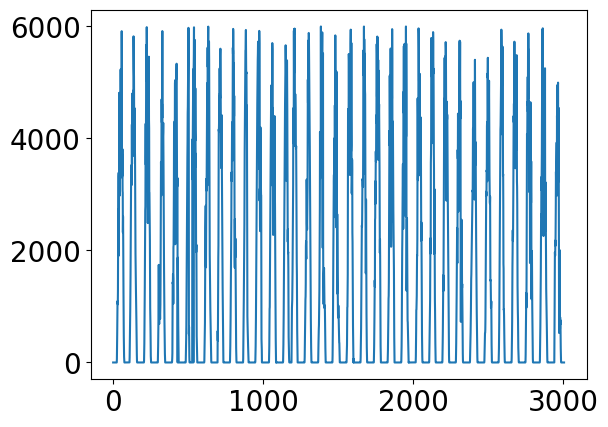

In [35]:
# There are a few outliers in the data that need to be removed
plt.plot(y)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [37]:
x_train.to_csv('Data/FES/solar_x_train.csv', sep = ',', index = False)
x_test.to_csv('Data/FES/solar_x_test.csv', sep = ',', index = False)
y_train.to_csv('Data/FES/solar_y_train.csv', sep = ',', index = False)
y_test.to_csv('Data/FES/solar_y_test.csv', sep = ',', index = False)